<a href="https://colab.research.google.com/github/JhonathanOrtiz/OpenCV-python/blob/master/Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [108]:
from google.colab import files
files.upload()

Saving descarga.jpg to descarga.jpg


{'descarga.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x0f\x0f\x0f\x10\x10\x10\x0f\x10\x0f\x0f\x10\x0f\x0f\x12\x11\x0f\x0e\x10\x10\x10\x10\x10\x10\x15\x11\x17\x17\x15\x15\x13\x17\x18\x1d( \x18\x1a%\x1b\x16\x15!1!%)+...\x17\x1f383-7(..+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-\x1f\x1f%-----.-+-----------------------+------------------\xff\xc0\x00\x11\x08\x00\xa8\x01+\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x06\x07\x02\x04\x05\x08\x03\xff\xc4\x00<\x10\x00\x02\x02\x01\x01\x06\x03\x05\x04\t\x03\x05\x00\x00\x00\x00\x00\x01\x02\x03\x11\x04\x05\x06\x12!1A\x07Qa\x13"2q\x81\x14\x91\xa1\xc1\x15#CRbr\x82\xa2\xb1$B\xe13c\x83\x92\xd1\xff\xc4\x00\x19\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00!\x11\x01\x00\x02\x02\x03\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x11\x12!1"A\x13Qa\



## Finding shapes.

The algorithm implemented in 

```
cv2.findContours()
```

For find shapes is most accurate with binary images, if you use this method after you should convert the image in a binary image, in our case we want to detect only black shape, then, applying color detection with



```
cv2.inRange()
```
 We will have our binary image

Mask image


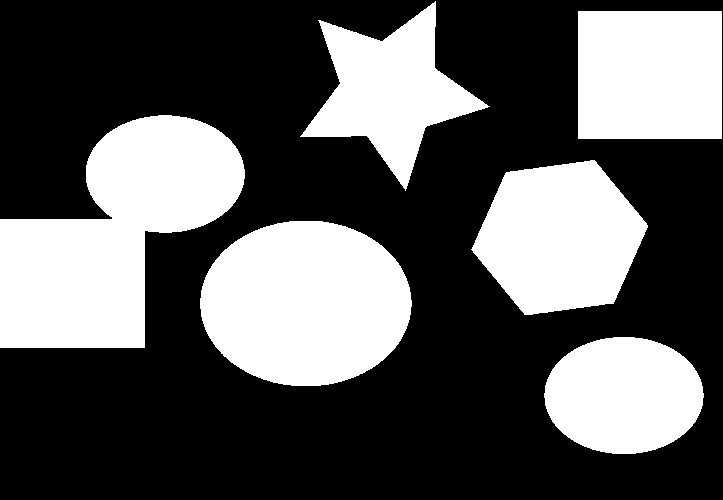

In [110]:
#Read image
image = cv2.imread('finding_shapes_example.png')
image_2 = cv2.imread('shapes_and_colors.jpg')

#We want only black object
lower = np.array([0, 0, 0])
upper = np.array([15, 15, 15])

#Compute the mask image
mask = cv2.inRange(image, lower, upper)


#Show image
print('Mask image')
cv2_imshow(mask)

In [0]:
#Documentation about this OpenCV method
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

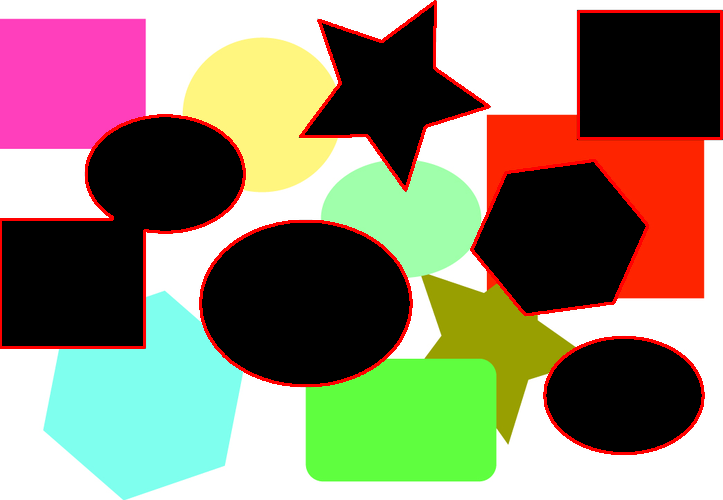

In [0]:
#Find Contours 
conts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#Draw Contours
for cont in conts:

  cv2.drawContours(image, [cont], -1, (0,0,255), 2)

cv2_imshow(image)

In [0]:
help(cv2.drawContours)

Help on built-in function drawContours:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
    .   @brief Draws contours outlines or filled contours.
    .   
    .   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
    .   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
    .   connected components from the binary image and label them: :
    .   @include snippets/imgproc_drawContours.cpp
    .   
    .   @param image Destination image.
    .   @param contours All the input contours. Each contour is stored as a point vector.
    .   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    .   @param color Color of the contours.
    .   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
    .   thickness

## Compute the center of the shape

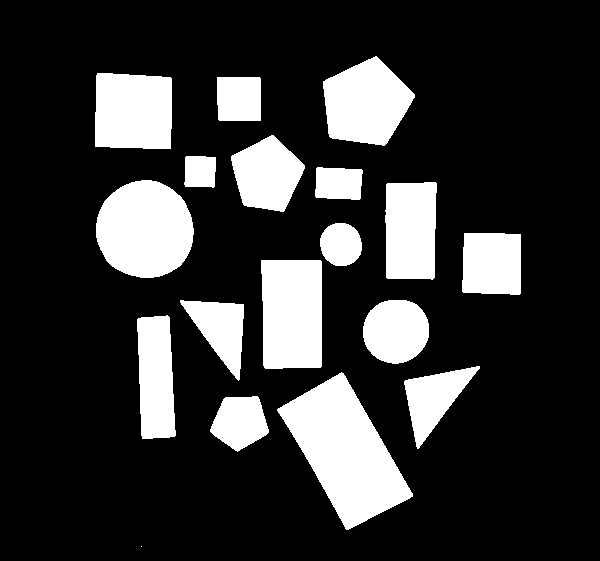

In [111]:
#Now preprosessing the image to detect all shapes on rge image

gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
#Smoothness
blurred = cv2.GaussianBlur(gray, (5,5), 0)
#To binary, threshold function retunrs a tuple with threshold value and the image
thresholded_image = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]


cv2_imshow(thresholded_image)


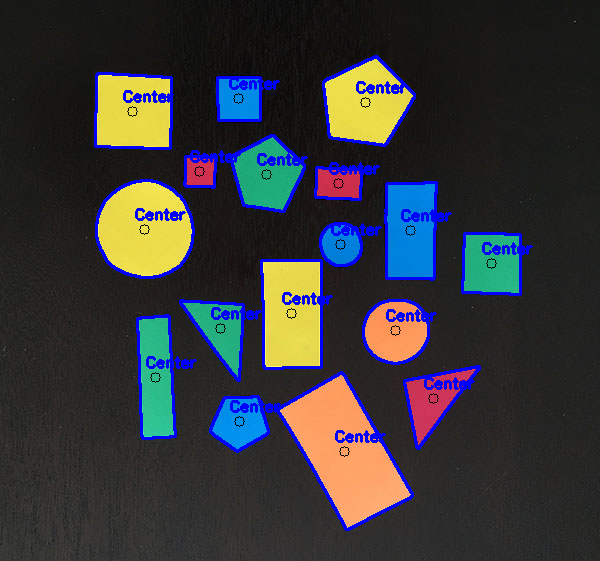

In [112]:
contours, _   = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for cont in contours:
	M = cv2.moments(cont)
	
	if M['m00'] and M['m10'] and M['m01'] != 0:
		cX = int(M['m10'] / M['m00'])
		cY = int(M['m01'] / M['m00'])
		
		cv2.drawContours(image_2, [cont], -1, (255,0,0), 2)
		cv2.circle(image_2, (cX, cY), 5, -1)
		cv2.putText(image_2, 'Center', (cX - 10, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 0, 0), 2)
	
cv2_imshow(image_2)

### Shape Centroid

Center is the *Arithmetic Meam* off all point in a 2-D shape, Centroid is not Center becuase it's The center of a circle is the point which is equidistant from all points on the circle. So, we can compute the centroid to any shape even the circle.

To compute the centroid we need compute de image moments, *Image Moments* is  the weigthed sum of pixel intensities. OpenCV has a functions that allow compute image moments.

```
cv2.moments()
```

Returns a dict with all computes and we need 'm00' 'm01' and 'm10' and apply the formula. 

x-corrdinate = 'M10' / 'M00'
y-coordinate = 'M01' / 'M00'

### Image Preprocessing

With *BGR2GRAY* we covert from color image to gray-scale image

With *GaussianBlur* we reduce the image noise

With *threshold* we convert a gray-scale to binary image. and we decide which pixel is part of our target.
 



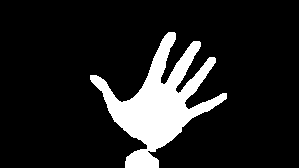

In [125]:
#Read image
hand = cv2.imread('descarga.jpg')

#Preprocess image
gray = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
blurred_ = cv2.GaussianBlur(gray, (5,5), 0)
thres_ = cv2.threshold(blurred_, 120, 255, cv2.THRESH_BINARY)[1]

#erode image and accentuate the objet feature
thres_ = cv2.erode(thres_, None, iterations=2)
thres_ = cv2.dilate(thres_, None, iterations=2)
cv2_imshow(thres_)

#Find contours
c, _ = cv2.findContours(thres_, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Sorting the values
c_ = max(c, key=cv2.contourArea)

In [0]:
#Determinate the extreme points

l_ext = tuple(c_[c_[:,:,0].argmin()][0])
r_ext = tuple(c_[c_[:,:,0].argmax()][0])
top_ext = tuple(c_[c_[:,:,1].argmin()][0])
bot_ext = tuple(c_[c_[:,:,1].argmax()][0])

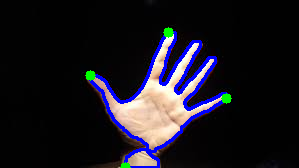

In [146]:
#Draw contours and put circles in extreme

cv2.drawContours(hand, [c_], -1, (255, 0, 0), 2)
cv2.circle(hand, (l_ext), 5, (0, 255, 0), -1)
cv2.circle(hand, (r_ext), 5, (0, 255, 0), -1)
cv2.circle(hand, (top_ext), 5, (0, 255, 0), -1)
cv2.circle(hand, (bot_ext), 5, (0, 255, 0), -1)

cv2_imshow(hand)

cv2.findContours Retunrs a coordinates (x, y) numpy array, so we can use the numpy method to find the max coordinates to top, bottom, right and left.